In [1]:
import pandas as pd
import numpy as np

In [2]:
data_path = "data//"

data_math      = "student-mat.xlsx"
data_portugese = "student-por.xlsx"

In [3]:
df_math = pd.read_excel(data_path + data_math)
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df_math.shape

(395, 33)

In [5]:
df_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
for col in df_math.columns:
    print(col)
    temp = df_math[col]
    print(temp.unique())

school
['GP' 'MS']
sex
['F' 'M']
age
[18 17 15 16 19 22 20 21]
address
['U' 'R']
famsize
['GT3' 'LE3']
Pstatus
['A' 'T']
Medu
[4 1 3 2 0]
Fedu
[4 1 2 3 0]
Mjob
['at_home' 'health' 'other' 'services' 'teacher']
Fjob
['teacher' 'other' 'services' 'health' 'at_home']
reason
['course' 'other' 'home' 'reputation']
guardian
['mother' 'father' 'other']
traveltime
[2 1 3 4]
studytime
[2 3 1 4]
failures
[0 3 2 1]
schoolsup
['yes' 'no']
famsup
['no' 'yes']
paid
['no' 'yes']
activities
['no' 'yes']
nursery
['yes' 'no']
higher
['yes' 'no']
internet
['no' 'yes']
romantic
['no' 'yes']
famrel
[4 5 3 1 2]
freetime
[3 2 4 1 5]
goout
[4 3 2 1 5]
Dalc
[1 2 5 3 4]
Walc
[1 3 2 4 5]
health
[3 5 1 2 4]
absences
[ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
G1
[ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2
[ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3
[ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7  0  4]


# Data Cleaning

It appears the data has 3 different types of data, binary, nominal and numeric.

Where the binary and nominal variables are string values. First we will need to convert the binary variables into numerical values (0 or 1) and then we will come back to nominal variables.

To do so we will need to do some renaming.

In [7]:
# In form:
# column, value to be replaced with 1, value to be replaced with 0
binary_vars = [
    ("school", "GP", "MS"),
    ("sex", "M", "F"),
    ("address", "U", "R"),
    ("famsize", "LE3", "GT3"),
    ("Pstatus", "T", "A"),
    ("schoolsup", "yes", "no"),
    ("famsup", "yes", "no"),
    ("paid", "yes", "no"),
    ("activities", "yes", "no"),
    ("nursery", "yes", "no"),
    ("higher", "yes", "no"),
    ("internet", "yes", "no"),
    ("romantic", "yes", "no")
]

In [8]:
for col, on_val, off_val in binary_vars:
    df_math[col] = df_math[col].replace(on_val, 1)
    df_math[col] = df_math[col].replace(off_val, 0)

In [9]:
df_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,18,1,0,0,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,1,0,17,1,0,1,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,1,0,15,1,1,1,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,1,0,15,1,0,1,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,1,0,16,1,0,1,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,20,1,1,0,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,0,1,17,1,1,1,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,0,1,21,0,0,1,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,0,1,18,0,1,1,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Now we want to propose one hot encoding to deal with nominal data, but we're not sure, so we'll apply it and see how much it increases the feature space to determine if its worth it or not.

In [10]:
# Copy so that we can revert changes if needed
temp_df = df_math.copy()

In [11]:
nominal = [
    "Mjob",
    "Fjob",
    "reason",
    "guardian"
]

In [12]:
pd.get_dummies(temp_df[nominal[0]], prefix=nominal[0])

for col in nominal:
    cur_ohe = pd.get_dummies(temp_df[col], prefix=col)
#     temp_df = temp_df.drop(col, axis = 1)
    temp_df = temp_df.join(cur_ohe)

temp_df.shape

(395, 50)

It appears like we have an increase of 13 features. Compared to the 26 original features (33 (total features from cell 33) - 4 (nominal features) - 3 (target features)). This means that we would roughly have a 2/3 to 1/3 ratio of ohe variables to normal variables. Thus it would be okay to continue with OHE. But we will keep this in mind for later.

In [13]:
df_math = temp_df

# Exploratory Analysis

Lets look at value counts, simple correlation matrices. Along with playing around with simple correlations.

Initially before looking at data my current paths:
Does the a student go to have some influence on the grades they received?

Does having parents that worked as a teacher (both or one) help increase your grades.

Is there a correlation between any of the after school variables (romantic, freetime, going out etc) have any impact on grades.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

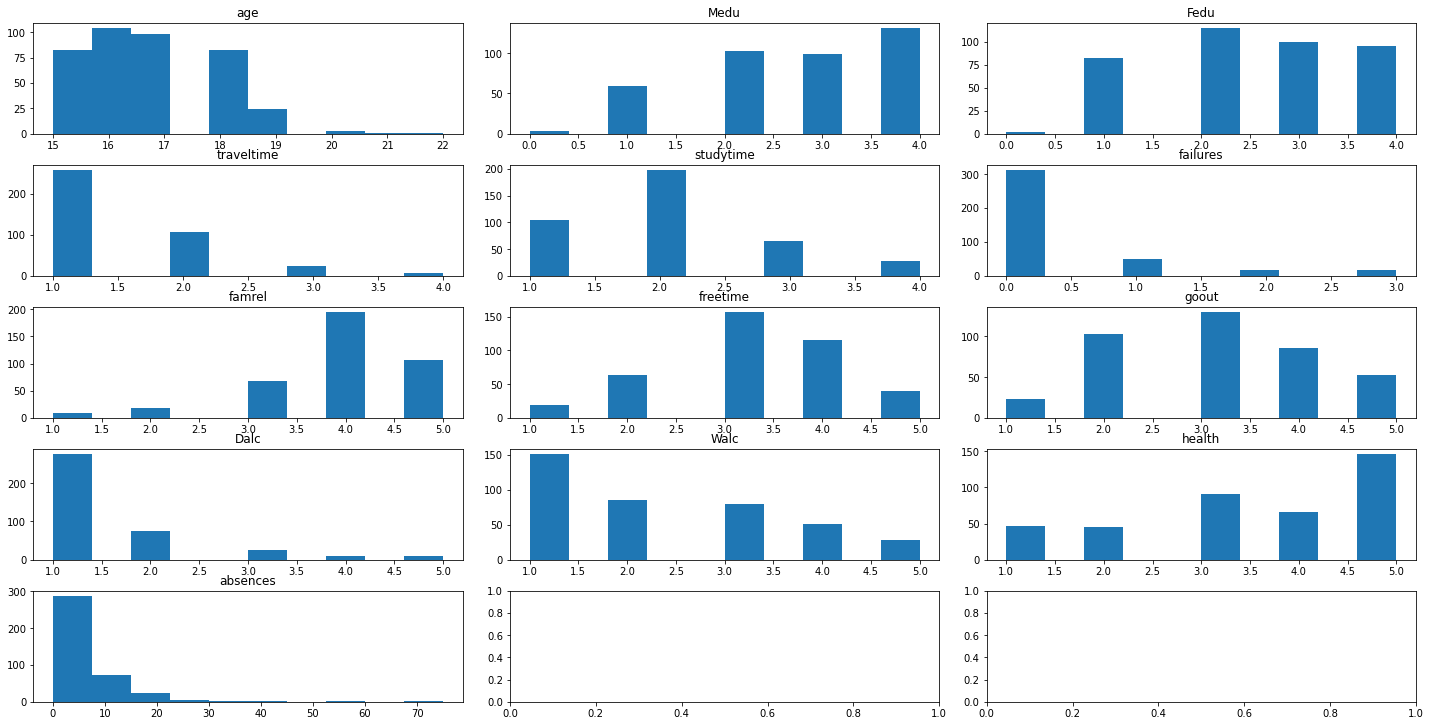

In [15]:
fig, ax = plt.subplots(5,3, figsize=(20,10))
fig.tight_layout(pad=1.0)

numeric_vars = [
    "age",
    "Medu",
    "Fedu",
    "traveltime",
    "studytime",
    "failures",
    "famrel",
    "freetime",
    "goout",
    "Dalc",
    "Walc",
    "health",
    "absences"
]

for i in range(len(numeric_vars)):
    col = numeric_vars[i]
    ax[i // 3][i % 3].hist(df_math[col])
    ax[i // 3][i % 3].set_title(col)

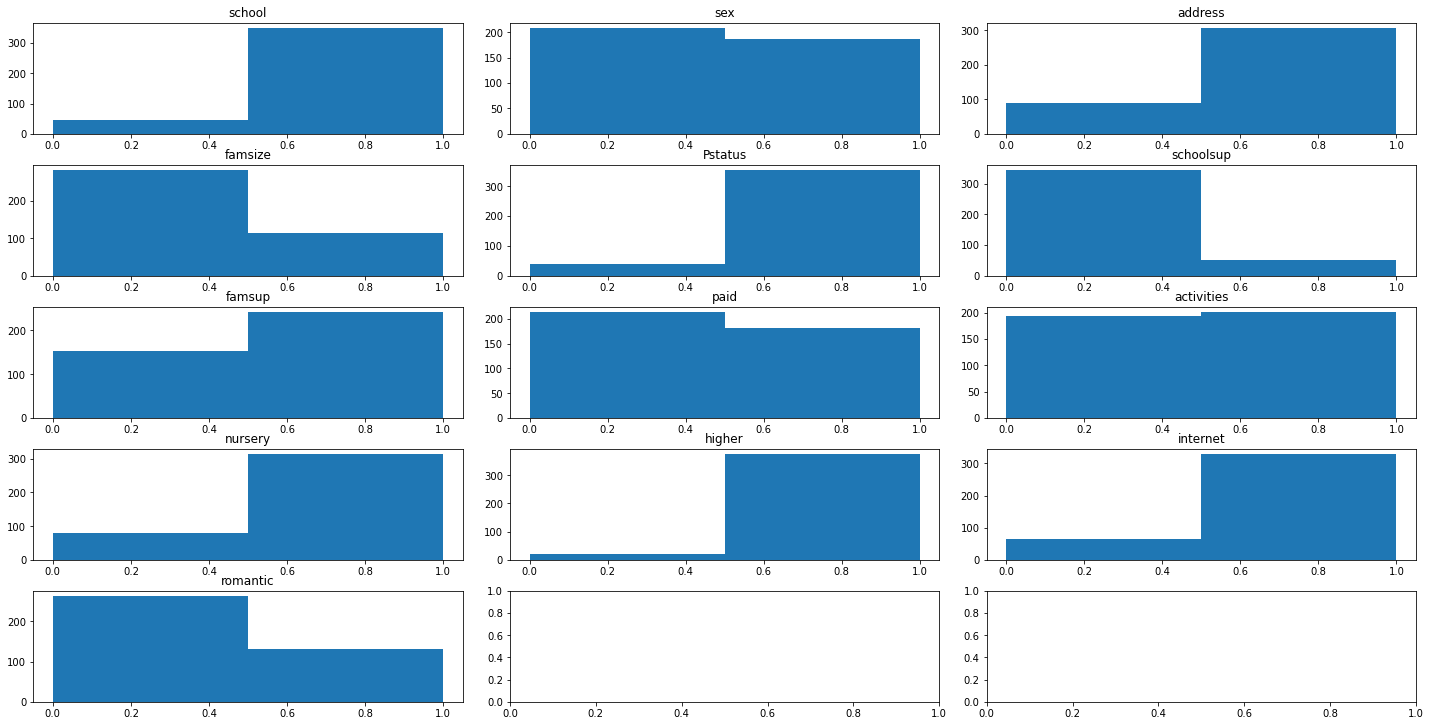

In [16]:
fig, ax = plt.subplots(5,3, figsize=(20,10))
fig.tight_layout(pad=1.0)

for i in range(len(binary_vars)):
    col = binary_vars[i][0]
    ax[i // 3][i % 3].hist(df_math[col], bins = 2)
    ax[i // 3][i % 3].set_title(col)

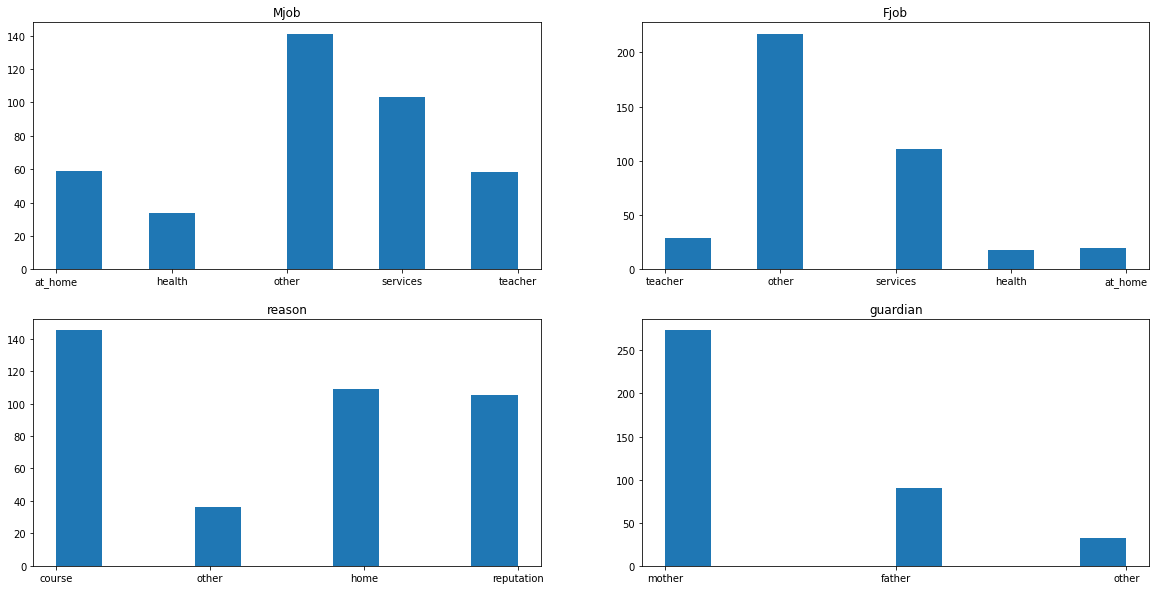

In [17]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

for i in range(len(nominal)):
    col = nominal[i]
    ax[i // 2][i % 2].hist(df_math[col])
    ax[i // 2][i % 2].set_title(col)

In [18]:
for i in df_math.columns:
    print(i)

school
sex
age
address
famsize
Pstatus
Medu
Fedu
Mjob
Fjob
reason
guardian
traveltime
studytime
failures
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic
famrel
freetime
goout
Dalc
Walc
health
absences
G1
G2
G3
Mjob_at_home
Mjob_health
Mjob_other
Mjob_services
Mjob_teacher
Fjob_at_home
Fjob_health
Fjob_other
Fjob_services
Fjob_teacher
reason_course
reason_home
reason_other
reason_reputation
guardian_father
guardian_mother
guardian_other


Text(0.5, 1.0, 'School Differences')

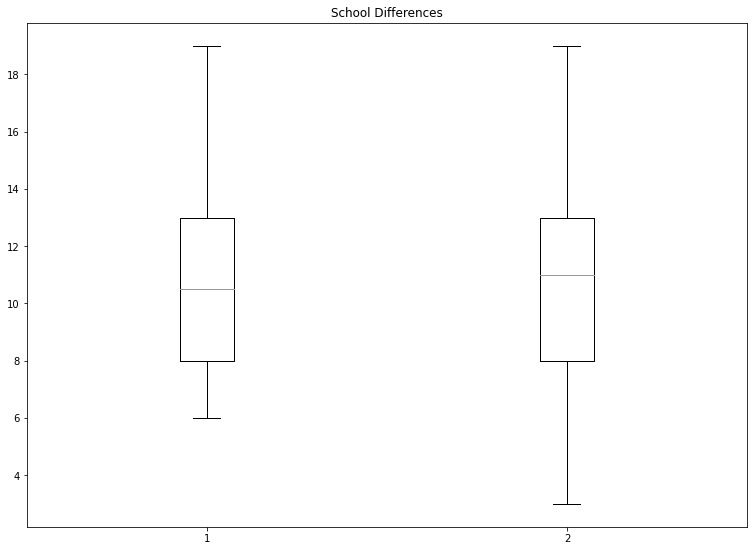

In [19]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])

condition = df_math["school"] == 0

data_1 = df_math[condition]["G1"]
data_2 = df_math[~condition]["G1"]
data = [data_1, data_2]
 
# Creating plot
bp = ax.boxplot(data)
ax.set_title("School Differences")

Text(0.5, 1.0, 'Parent Job Differences')

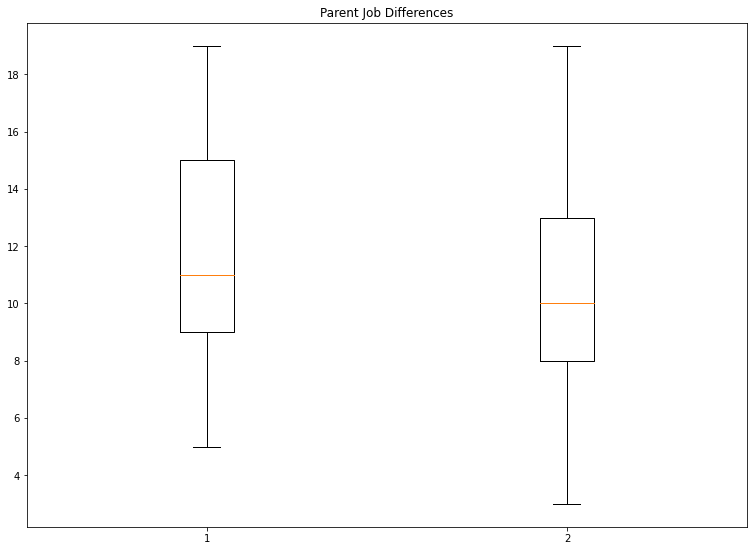

In [20]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])

condition = (
    (df_math["Mjob_teacher"] == 1) |
    (df_math["Fjob_teacher"] == 1)
)

data_1 = df_math[condition]["G1"]
data_2 = df_math[~condition]["G1"]
data = [data_1, data_2]
 
# Creating plot
bp = ax.boxplot(data)
ax.set_title("Parent Job Differences")

Text(0.5, 1.0, 'Parent Education Differences')

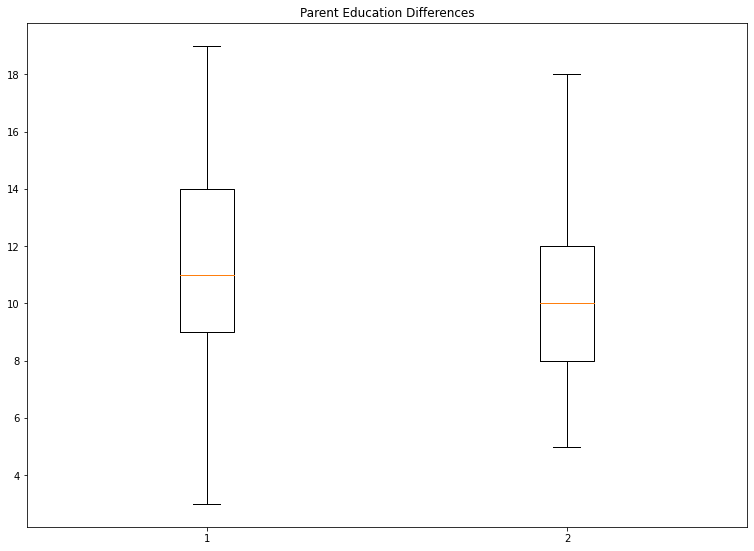

In [21]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])

condition = (
    (df_math["Medu"] >= 3) |
    (df_math["Fedu"] >= 3)
)

data_1 = df_math[condition]["G1"]
data_2 = df_math[~condition]["G1"]
data = [data_1, data_2]
 
# Creating plot
bp = ax.boxplot(data)
ax.set_title("Parent Education Differences")

Text(0.5, 1.0, 'Social Life Differences')

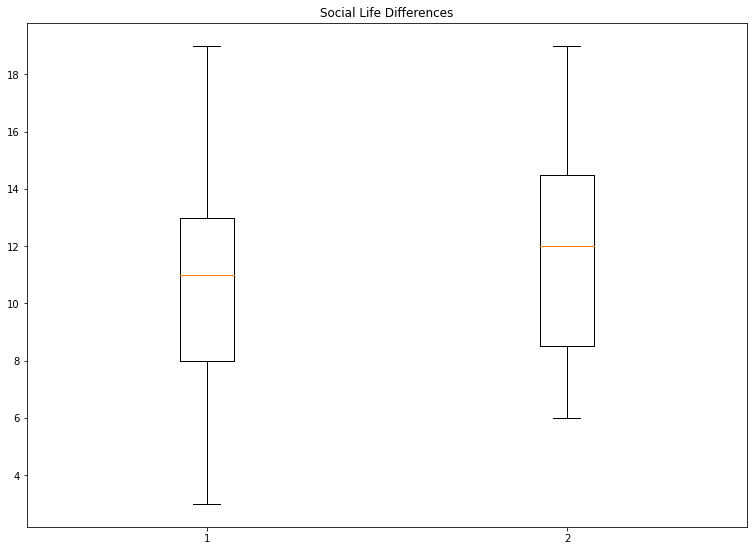

In [22]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])

condition = (
    (df_math["romantic"] == 1) |
    (df_math["freetime"] >= 3) |
    (df_math["goout"] >= 3) |
    (df_math["Dalc"] >= 3) |
    (df_math["Walc"] >= 3)
)

data_1 = df_math[condition]["G1"]
data_2 = df_math[~condition]["G1"]
data = [data_1, data_2]
 
# Creating plot
bp = ax.boxplot(data)
ax.set_title("Social Life Differences")

Text(0.5, 1.0, 'Educational Differences')

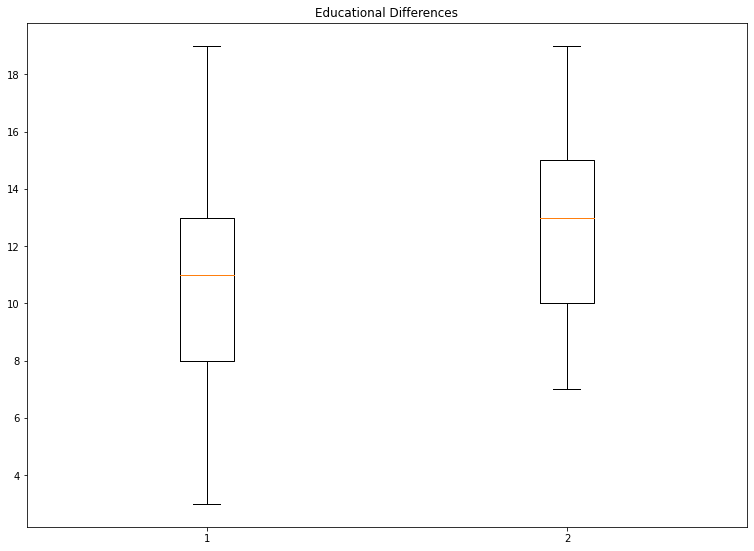

In [23]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])

condition = (
    (df_math["failures"] >= 1) |
    (df_math["studytime"] <= 2 ) |
    (df_math["absences"] >= 1)
)

data_1 = df_math[condition]["G1"]
data_2 = df_math[~condition]["G1"]
data = [data_1, data_2]
 
# Creating plot
bp = ax.boxplot(data)
ax.set_title("Educational Differences")

Text(0.5, 1.0, 'Age Differences')

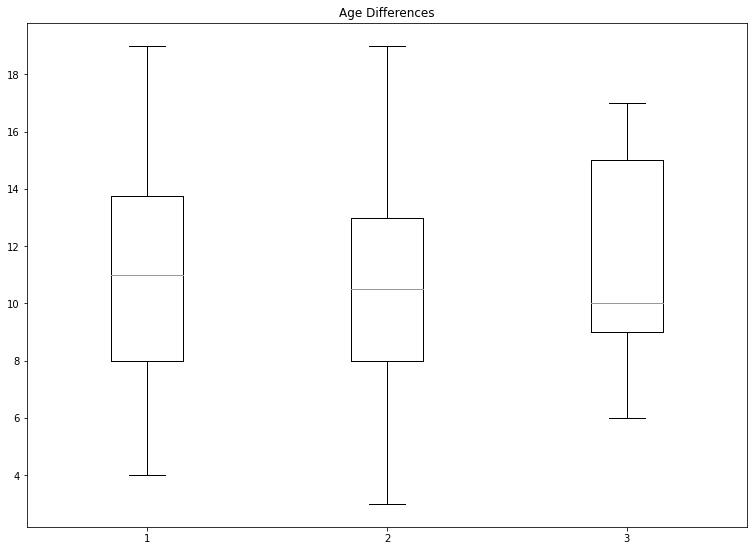

In [24]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])

condition1 = (
    (df_math["age"] < 17) 
)

condition2 = (
    (df_math["age"] >= 17) &
    (df_math["age"] < 20)
)

condition3 = (
    (df_math["age"] >= 20)
)

data_1 = df_math[condition1]["G1"]
data_2 = df_math[condition2]["G1"]
data_3 = df_math[condition3]["G1"]
data = [data_1, data_2, data_3]
 
# Creating plot
bp = ax.boxplot(data)
ax.set_title("Age Differences")

In [25]:
data_1 = np.random.normal(100, 10, 200)
data_1.shape

(200,)

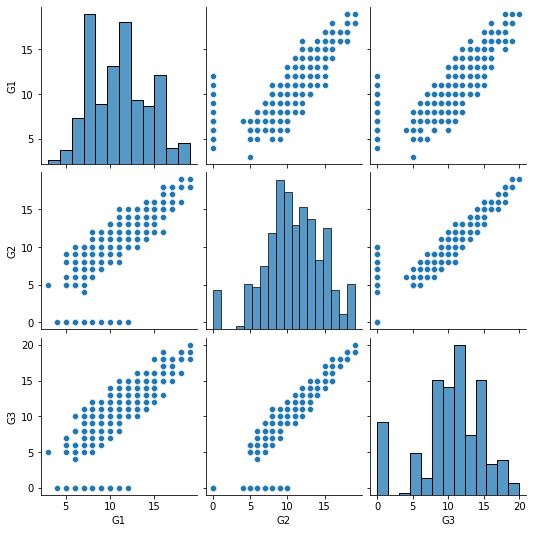

In [27]:
# First looking at the target correlations
sns.pairplot(df_math[["G1", "G2", "G3"]])

So there is a huge correlation between the different target variables with the exception of a few outliers. So here we will only be focusing on trying to predict one target variable. We will determine later what it will be.

# Target 1 - First Year Prediction